In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.cluster import KMeans

In [4]:
sns.set()

In [54]:
df = pd.read_excel('tcc\Game8.xlsx', sheet_name = 'Sheet1')

In [55]:
df.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,offer
0,61299,Strongly disagree,Strongly disagree,Strongly disagree,Slightly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,...,Strongly disagree,Strongly disagree,Slightly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Slightly agree,Slightly agree,5.0
1,44619,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Slightly disagree,Slightly agree,Slightly disagree,Strongly disagree,...,Strongly agree,Slightly agree,Slightly disagree,Slightly agree,Slightly disagree,Slightly agree,Strongly agree,Slightly agree,Slightly disagree,10.0
2,81489,Slightly agree,Slightly disagree,Slightly agree,Slightly disagree,Slightly agree,Slightly agree,Strongly agree,Slightly agree,Slightly disagree,...,Slightly disagree,Strongly agree,Slightly disagree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,5.0
3,26881,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,...,Strongly agree,Strongly agree,Slightly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,9.0
4,10895,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Slightly agree,Strongly agree,...,Slightly agree,Strongly agree,Slightly agree,Strongly agree,Strongly agree,Slightly agree,Strongly agree,Slightly agree,Strongly agree,10.0


In [56]:
df_int = []
for offer in np.array(df['offer']):
    df_int.append(int(offer))
df['offer'] = df_int

In [57]:
str_to_num = {'Strongly agree': 4, 'Slightly agree': 3, 'Slightly disagree': 2, 'Strongly disagree': 1}
for q in df.columns[1:-1]:
    df[q] = df[q].map(str_to_num)

In [58]:
resultados = []
for row in range(df.shape[0]):
    resultados.append(df.iloc[row][1:].sum())
resultados = np.array(resultados)

In [59]:
resultados_media = resultados.mean()
resultados_sd = resultados.std()
resultados_corte = resultados_media + resultados_sd

In [60]:
classificacao = []
for resultado in resultados:
    if resultado <= resultados_corte:
        classificacao.append(0)
    else:
        classificacao.append(1)

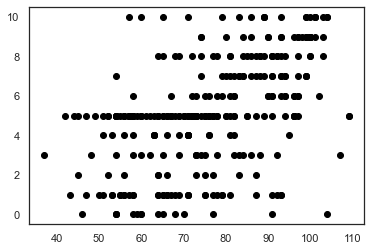

In [61]:
plt.scatter(x = resultados, y = df['offer'], c = 'black')

In [62]:
df['classificacao'] = classificacao

In [63]:
df['resultados'] = resultados

<AxesSubplot:xlabel='resultados', ylabel='offer'>

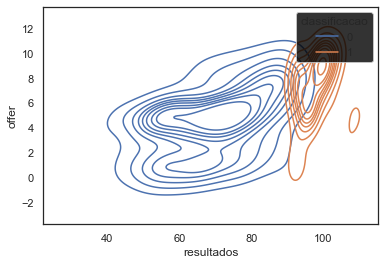

In [64]:
sns.kdeplot(
    data=df,
    x="resultados",
    y="offer",
    hue="classificacao",
    thresh=.1
)

In [65]:
df_offer_resultados = df[['offer', 'resultados']]
df_resultados = df['resultados']

In [66]:
kmeans = KMeans(2)
kmeans.fit(df_offer_resultados)

KMeans(n_clusters=2)

In [67]:
clusters = kmeans.fit_predict(df_offer_resultados)
clusters

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
data_with_clusters = df_offer_resultados.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters

,offer,resultados,Cluster
0,5,45,0
1,10,83,1
2,5,85,1
3,9,100,1
4,10,101,1
...,...,...,...
311,5,109,1
312,5,67,0
313,0,104,1
314,6,72,0


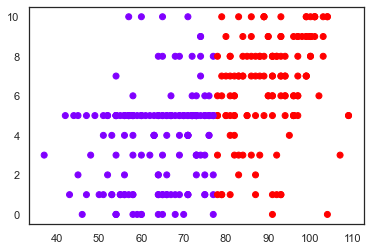

In [69]:
plt.scatter(df_offer_resultados['resultados'], df_offer_resultados['offer'], 
            c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

<AxesSubplot:xlabel='resultados', ylabel='offer'>

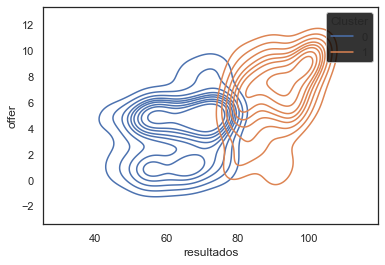

In [70]:
sns.kdeplot(
    data=data_with_clusters,
    x="resultados",
    y="offer",
    hue="Cluster",
    thresh=.1
)

C:\Users\015344631\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\015344631\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\015344631\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\015344631\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


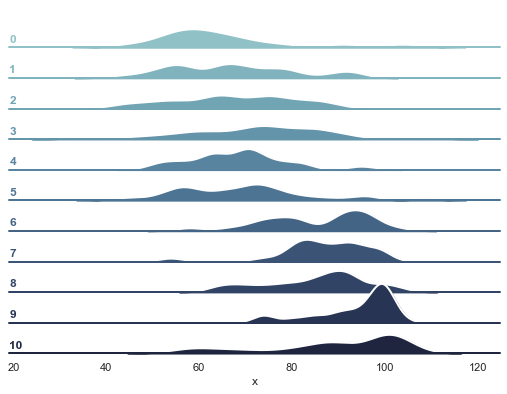

In [83]:
rs = np.random.RandomState(1979)
x = df['resultados']
g = df['offer']
df2 = pd.DataFrame(dict(x=x, g=g))

pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
g = sns.FacetGrid(df2, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [84]:
# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

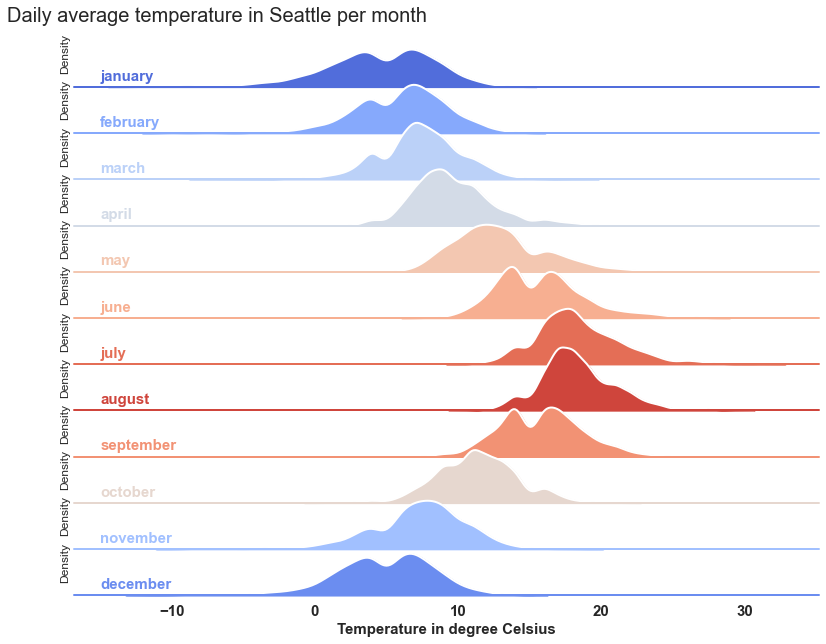

In [85]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()